In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from numpy import polyfit, polyval

from matplotlib.gridspec import GridSpec


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

In [2]:
def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))

In [3]:
f_coefs=h5py.File('/reg/d/psdm/cxi/cxilr6716/results/flatfield_calibration/copper_cali_coefs.h5','r')
print f_coefs.keys()
basic_mask = np.load('/reg/d/psdm/cxi/cxilr6716/results/masks/basic_psana_mask.npy')

[u'cali_fit_nShots', u'cali_fit_shots', u'cali_fit_std', u'coefs_10', u'coefs_15', u'coefs_20', u'coefs_5', u'test1_cali_10', u'test1_cali_15', u'test1_cali_20', u'test1_cali_5', u'test1_shots', u'test2_cali_10', u'test2_cali_15', u'test2_cali_20', u'test2_cali_5']


In [5]:

fit_shots=f_coefs['cali_fit_shots'].value
fit_shots_std=f_coefs['cali_fit_std'].value
n_shots = f_coefs['cali_fit_nShots'].value
mean_int = fit_shots.mean(-1)
full_shots = unflatten_shots(fit_shots,basic_mask)


In [ ]:
colors=['b','g','c']
inds = [1219800,1219800+1540*55+500,167634-1890]
plt.figure(figsize=[8,8])
# print np.where(pixel_mask==1)[0][0],np.where(pixel_mask==1)[1][0]
im = plt.imshow(full_shots[25], aspect=1, cmap='hot',vmin=50,vmax=65)
plt.colorbar()
for ii,pixel_ind in enumerate(inds):
    pixel_mask = np.zeros_like(fit_shots[0])
    pixel_mask[pixel_ind] = 1
    pixel_mask=unflatten_shots(pixel_mask[None,:],basic_mask)[0]

    
    x=np.where(pixel_mask==1)[0][0]
    y=np.where(pixel_mask==1)[1][0]
    plt.plot(x,y,'o', c=colors[ii], markersize=12)
    plt.xlim(0,full_shots.shape[1])
    plt.ylim(0,full_shots.shape[2])

In [150]:
mean_int[25]

54.459498339949285

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.10/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


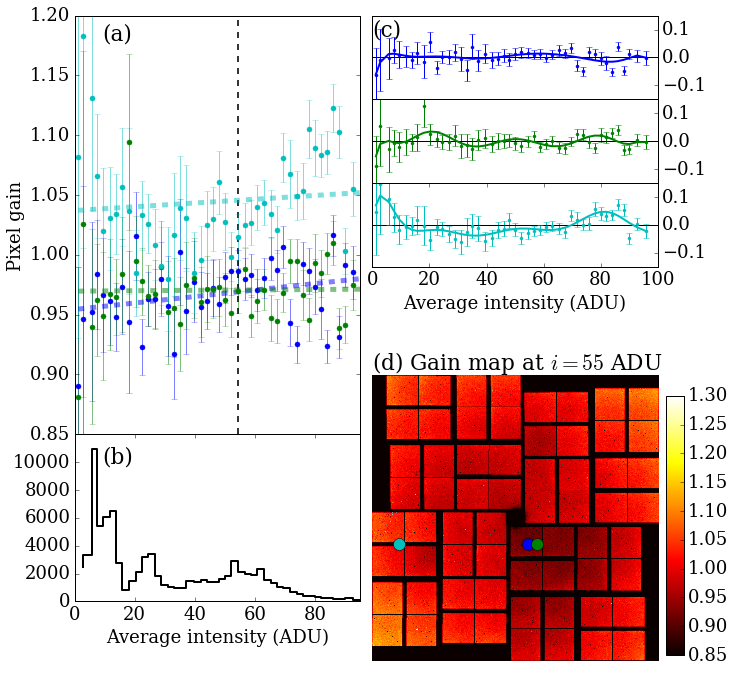

In [156]:

fig = plt.figure(figsize=[12,12])
gs = GridSpec(8,8)
gs.update(hspace=0)
gs2 = GridSpec(8,8)
colors=['b','g','c']
inds = [1219800,1219800+1540*55+500,167634-990]

####################locations of pixles
ax=plt.subplot(gs[4:,4:])
x=mean_int[25]/full_shots[25]
x[np.isinf(x)]=0
im = plt.imshow(x, aspect=1, cmap='hot',vmin=0.85,vmax=1.3)
ax.set_title('(d) Gain map at $i = 55$ ADU  ', x= 0.52,y =1., color='Black')
ax.set_axis_off()


for ii,pixel_ind in enumerate(inds):
    pixel_mask = np.zeros_like(fit_shots[0])
    pixel_mask[pixel_ind] = 1
    pixel_mask=unflatten_shots(pixel_mask[None,:],basic_mask)[0]

    
    x=np.where(pixel_mask==1)[0][0]
    y=np.where(pixel_mask==1)[1][0]
    plt.plot(x,y,'o', c=colors[ii], markersize=12)
    plt.xlim(0,full_shots.shape[1])
    plt.ylim(0,full_shots.shape[2])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.16, 0.02, 0.3])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('right')


##################calibration curves

for ii,ind in enumerate(inds):
    ####### calibration curves
    ax=plt.subplot(gs2[ii,4:])
    gs2.update(hspace=0)
  
    fit = polyval(polyfit(mean_int, mean_int[:]/fit_shots[:,ind],deg=1), mean_int)
    res = mean_int[:]/fit_shots[:,ind]-fit
    err = np.abs(mean_int[:]/fit_shots[:,ind]-mean_int[:]/(fit_shots[:,ind]+fit_shots_std[:,ind]/2))
    plt.errorbar(mean_int,
             res,fmt='.',c=colors[ii],
            yerr= err
             ,linewidth=1)
    fit_res = polyval(polyfit(mean_int,res,deg=10), mean_int)
    plt.plot(mean_int,
             fit_res,
            c=colors[ii]
            ,linewidth=2)
    plt.hlines(0,0,100)
    plt.xlim(0,100)
    ax.yaxis.set_ticks_position('right')
    plt.ylim(-0.15,0.15)
    plt.yticks([-0.1,0,0.1])
    if ii<2:
        plt.xticks([])
    if ii==2:
        plt.xlabel('Average intensity (ADU)')
    if ii ==0:
        ax.set_title('(c)', x= 0.05,y =0.7, color='black')
    ################calibrtion curves
    ax=plt.subplot(gs[:5,:4])
    ax.set_title('(a)', x= 0.15,y =0.93, color='k')
    plt.plot(mean_int, mean_int[:]/fit_shots[:,ind],'.',c=colors[ii], markersize=10)
#     err = np.abs(mean_int[:]/fit_shots[:,ind]-mean_int[:]/(fit_shots[:,ind]+fit_shots_std[:,ind]/2))
    plt.errorbar(mean_int, mean_int[:]/fit_shots[:,ind],yerr=err,
                 fmt='.',c=colors[ii], alpha = 0.5)
    plt.plot(mean_int, fit,'--',c=colors[ii], linewidth=5, alpha=0.5)
    plt.xticks([])
    plt.xlim(0,95)
    plt.ylim(0.85,1.2)
    plt.ylabel('Pixel gain')
    
    plt.vlines(mean_int[25],0.85,1.2, alpha=0.4, linewidth=2, color='k', linestyle='--')
########### number of shots per bin
ax=plt.subplot(gs[5:7,:4])
plt.step(mean_int[1:], n_shots[1:],linewidth=2, color='k')
plt.xlim(0,95)
plt.xlabel('Average intensity (ADU)')
ax.yaxis.set_ticks_position('left')
plt.ylim(0,12000)
plt.yticks([0,2000,4000,6000,8000,10000])
ax.set_title('(b)', x= 0.15,y =0.8, color='k')

plt.savefig('nonlinear_gain.png')

In [7]:
n_shots.shape

(45,)

In [ ]:
plt.step(mean_int[1:], n_shots[1:], linewidth=2)
plt.xlim(0,100)

In [ ]:
pixel_mask[3,1354]